### Métricas de las redes:

Cada una de las redes entrenadas tuvo una duración de $\approx 15$ horas en el servidor KHIPU de la Universidad de La Frontera. Cada red fue entrenada con los mismos hiperparámetros y el mismo conjunto de entrenamiento y validación. La red entrenada es una U-net 2D.

| red i | Batch size | LR | Optimizador | Épocas | Interpolación | f. activación salida |
|------ |----------- |----| ----        | ----- | ----- | ----- | 
| 1     |    32      |  Default |  Adam | 60 | Nearest | sigmoid  |
| 2   |    32      |   Default | Adam | 60 | Bilinear | sigmoid |
| 3  |    32      |   Default | Adam | 60 | Bicubic | linear   |

<br>

>> Pequeño disclaimer: se reconoce el sobreajuste de cada una de las redes y corresponde a un resultado esperado.

#### Historial de las redes entrenadas:

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import pickle 

%matplotlib inline

with open('historiales/historial_UNET_080624_10_60_BS32_8var_nearest_sigmoid.pkl', 'rb') as file:
    history_1 = pickle.load(file)
with open('historiales/historial_UNET_080624_10_60_BS32_8var_bilinear_sigmoid.pkl', 'rb') as file:
    history_2 = pickle.load(file)
with open('historiales/historial_UNET_080624_10_60_BS32_8var_bicubic_linear.pkl', 'rb') as file:
    history_3 = pickle.load(file)

historiales=[history_1, history_2, history_3] 
metricas=["loss", "val_loss", "mse", "val_mse", "mae", "val_mae","mape", "val_mape"]
resumen=pd.DataFrame()

for i in range(8): # #{metricas}
    valores=[]

    valores.append(historiales[0][metricas[i]][-1])
    valores.append(historiales[1][metricas[i]][-1])
    valores.append(historiales[2][metricas[i]][-1])

    resumen[metricas[i]]= valores

resumen= pd.concat( [resumen, pd.DataFrame([resumen.mean()])], ignore_index=True) #add promedio
resumen= pd.concat( [resumen, pd.DataFrame([resumen.std()])], ignore_index=True) #add std
resumen= resumen.rename(index={0:"1", 1:"2", 2: "3", 3: "mean", 4:"std"}) #nuevos indices
resumen

,loss,val_loss,mse,val_mse,mae,val_mae,mape,val_mape
1,0.000315,0.000827,0.000315,0.000827,0.012853,0.018586,26.615141,38.735714
2,0.000268,0.000823,0.000268,0.000823,0.011905,0.018621,24.749205,36.875938
3,0.000192,0.000806,0.000192,0.000806,0.010101,0.018509,20.881050,36.204151
mean,0.000258,0.000819,0.000258,0.000819,0.011620,0.018572,24.081799,37.271935
std,0.000051,0.000009,0.000051,0.000009,0.001141,0.000047,2.388029,1.070767


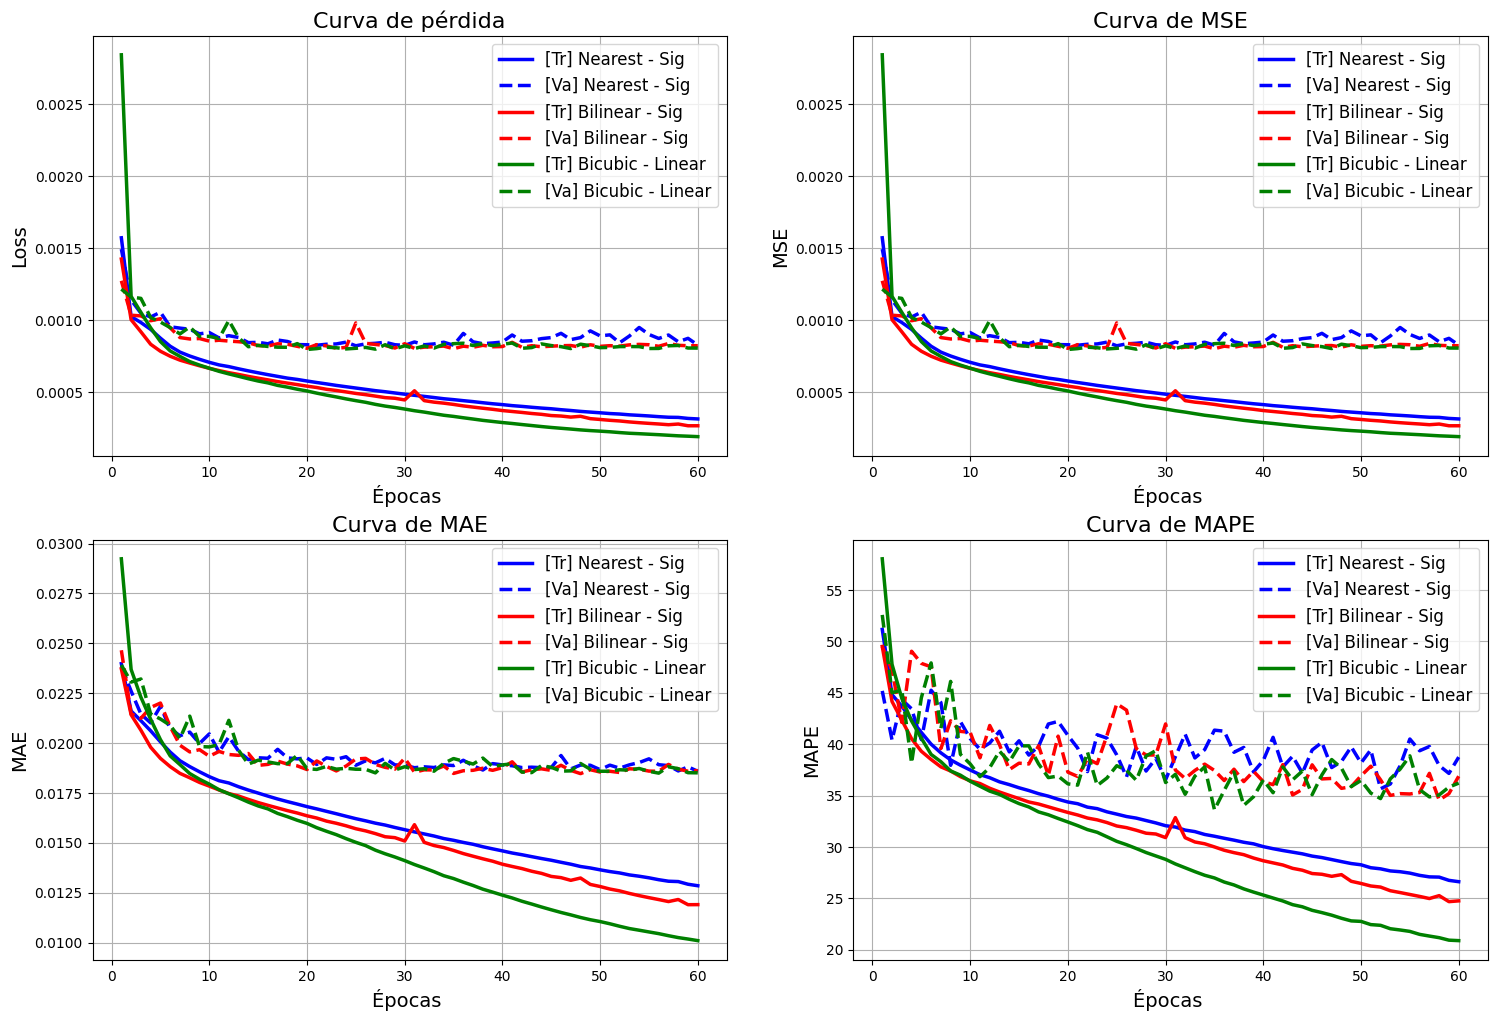

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
epochs= len(history_1['loss'])
lw=2.5

##plot 1##
axs[0, 0].plot(np.arange(1,epochs+1), history_1['loss'],linewidth=lw, color="blue", label='a')
axs[0, 0].plot(np.arange(1,epochs+1), history_1['val_loss'], linestyle='--', linewidth=lw, color="blue")
axs[0, 0].plot(np.arange(1,epochs+1), history_2['loss'],linewidth=lw, color="red", label='a')
axs[0, 0].plot(np.arange(1,epochs+1), history_2['val_loss'], linestyle='--', linewidth=lw, color="red")
axs[0, 0].plot(np.arange(1,epochs+1), history_3['loss'],linewidth=lw, color="green", label='a')
axs[0, 0].plot(np.arange(1,epochs+1), history_3['val_loss'], linestyle='--', linewidth=lw, color="green")


axs[0, 0].legend(['[Tr] Nearest - Sig', '[Va] Nearest - Sig', '[Tr] Bilinear - Sig', '[Va] Bilinear - Sig', '[Tr] Bicubic - Linear', '[Va] Bicubic - Linear'],fontsize=12)
axs[0, 0].set_xlabel('Épocas ',fontsize=14)
axs[0, 0].set_ylabel('Loss',fontsize=14)
axs[0, 0].set_title('Curva de pérdida',fontsize=16)

axs[0,0].grid()

##plot 2##
axs[0, 1].plot(np.arange(1,epochs+1), history_1['mse'],linewidth=lw, color="blue", label='a')
axs[0, 1].plot(np.arange(1,epochs+1), history_1['val_mse'], linestyle='--', linewidth=lw, color="blue")
axs[0, 1].plot(np.arange(1,epochs+1), history_2['mse'],linewidth=lw, color="red", label='a')
axs[0, 1].plot(np.arange(1,epochs+1), history_2['val_mse'], linestyle='--', linewidth=lw, color="red")
axs[0, 1].plot(np.arange(1,epochs+1), history_3['mse'],linewidth=lw, color="green", label='a')
axs[0, 1].plot(np.arange(1,epochs+1), history_3['val_mse'], linestyle='--', linewidth=lw, color="green")


axs[0, 1].legend(['[Tr] Nearest - Sig', '[Va] Nearest - Sig', '[Tr] Bilinear - Sig', '[Va] Bilinear - Sig', '[Tr] Bicubic - Linear', '[Va] Bicubic - Linear'],fontsize=12)
axs[0, 1].set_xlabel('Épocas ',fontsize=14)
axs[0, 1].set_ylabel('MSE',fontsize=14)
axs[0, 1].set_title('Curva de MSE',fontsize=16)

axs[0,1].grid()

##plot 3##
axs[1, 0].plot(np.arange(1,epochs+1), history_1['mae'],linewidth=lw, color="blue", label='a')
axs[1, 0].plot(np.arange(1,epochs+1), history_1['val_mae'], linestyle='--', linewidth=lw, color="blue")
axs[1, 0].plot(np.arange(1,epochs+1), history_2['mae'],linewidth=lw, color="red", label='a')
axs[1, 0].plot(np.arange(1,epochs+1), history_2['val_mae'], linestyle='--', linewidth=lw, color="red")
axs[1, 0].plot(np.arange(1,epochs+1), history_3['mae'],linewidth=lw, color="green", label='a')
axs[1, 0].plot(np.arange(1,epochs+1), history_3['val_mae'], linestyle='--', linewidth=lw, color="green")


axs[1, 0].legend(['[Tr] Nearest - Sig', '[Va] Nearest - Sig', '[Tr] Bilinear - Sig', '[Va] Bilinear - Sig', '[Tr] Bicubic - Linear', '[Va] Bicubic - Linear'],fontsize=12)
axs[1, 0].set_xlabel('Épocas ',fontsize=14)
axs[1, 0].set_ylabel('MAE',fontsize=14)
axs[1, 0].set_title('Curva de MAE',fontsize=16)

axs[1,0].grid()

##plot 4##
axs[1, 1].plot(np.arange(1,epochs+1), history_1['mape'],linewidth=lw, color="blue", label='a')
axs[1, 1].plot(np.arange(1,epochs+1), history_1['val_mape'], linestyle='--', linewidth=lw, color="blue")
axs[1, 1].plot(np.arange(1,epochs+1), history_2['mape'],linewidth=lw, color="red", label='a')
axs[1, 1].plot(np.arange(1,epochs+1), history_2['val_mape'], linestyle='--', linewidth=lw, color="red")
axs[1, 1].plot(np.arange(1,epochs+1), history_3['mape'],linewidth=lw, color="green", label='a')
axs[1, 1].plot(np.arange(1,epochs+1), history_3['val_mape'], linestyle='--', linewidth=lw, color="green")


axs[1, 1].legend(['[Tr] Nearest - Sig', '[Va] Nearest - Sig', '[Tr] Bilinear - Sig', '[Va] Bilinear - Sig', '[Tr] Bicubic - Linear', '[Va] Bicubic - Linear'],fontsize=12)
axs[1, 1].set_xlabel('Épocas ',fontsize=14)
axs[1, 1].set_ylabel('MAPE',fontsize=14)
axs[1, 1].set_title('Curva de MAPE',fontsize=16)

axs[1,1].grid()